# Power Law
https://arxiv.org/abs/cond-mat/0412004
Implement Figure 3 in this paper. This involves reading the first part of Section 2 (from footnote 3 on page 3 to the end of page 4). Note that to find the power law cdf, just search for how to make a cdf on stackoverflow (https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy, second answer that doesn't do histogram binning)

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
# transformation method
x_min = 1
alpha_ = 2.5
N = 10**6
# p(x) = Cx^{-\alpha}
def random_power_samples(N, x_min, alpha):
    r = np.random.random(N)
    x = x_min * (1 - r) ** (-1/(alpha-1))
    return x
xs = random_power_samples(N, x_min, alpha_)

In [50]:
def normal_histogram(ax, xs, x_min):
    bins = np.arange(x_min, np.ceil(max(xs)), 0.1)
    hist, bin_edges = np.histogram(xs, bins=bins)
    ax.plot(bin_edges[1:], hist/N*10) # scaled to get right factor?
    ax.set_xlim((0, 8))
    ax.set_ylim((0, 1.5))
    ax.set_xlabel('x')
    ax.set_ylabel('samples (with some scaling)')
    ax.set_title('Normal histogram')

In [51]:
def log_normal_histogram(ax, xs, x_min):
    bins = np.arange(x_min, np.ceil(max(xs)), 0.1)
    hist, bin_edges = np.histogram(xs, bins=bins)
    ax.loglog(bin_edges[1:,], hist/N*10) # scaled again for right factor
    ax.set_xlabel('x')
    ax.set_xlim((1, 200))
    ax.set_ylabel('samples')
    ax.set_title('Simple log-log plot')

In [61]:
def binning_ranges(x_min, x_max, w=0.1):
    bins = [x_min]
    bin_max = x_min
    num_bins = 0
    while bin_max < x_max:
        bin_max += 0.1 * (2 ** num_bins) # new bin width
        bins.append(bin_max)
        num_bins += 1
    return bins
        
def log_binning_histogram(ax, xs, x_min):
    # first, construct 
    bins = binning_ranges(x_min, np.ceil(max(xs)), 0.1)
    hist, bin_edges = np.histogram(xs, bins=bins)
    print(hist)
    print(bin_edges)
    print(bin_edges[1:]-bin_edges[:-1])
    ax.loglog(bin_edges[1:,], hist/N*10) # scaled again for right factor
    ax.set_xlabel('x')
    ax.set_xlim((1, 3000))
    ax.set_ylabel('samples')
    ax.set_title('Logarithmic binning')

In [76]:
def cdf_plot(ax, xs, x_min):
    popularity = np.sort(xs)
    N = len(xs)
    y = 1 - np.arange(N)/N
    ax.loglog(popularity, y)
    ax.set_xlabel('x')
    ax.set_xlim((1,3000))
    ax.set_ylabel('samples with value > x')
    ax.set_title('CDF')

[132839 192289 223333 197549 133063  69981  31168  12399   4739   1684
    632    208     76     26     10      1      3]
[1.00000e+00 1.10000e+00 1.30000e+00 1.70000e+00 2.50000e+00 4.10000e+00
 7.30000e+00 1.37000e+01 2.65000e+01 5.21000e+01 1.03300e+02 2.05700e+02
 4.10500e+02 8.20100e+02 1.63930e+03 3.27770e+03 6.55450e+03 1.31081e+04]
[1.0000e-01 2.0000e-01 4.0000e-01 8.0000e-01 1.6000e+00 3.2000e+00
 6.4000e+00 1.2800e+01 2.5600e+01 5.1200e+01 1.0240e+02 2.0480e+02
 4.0960e+02 8.1920e+02 1.6384e+03 3.2768e+03 6.5536e+03]


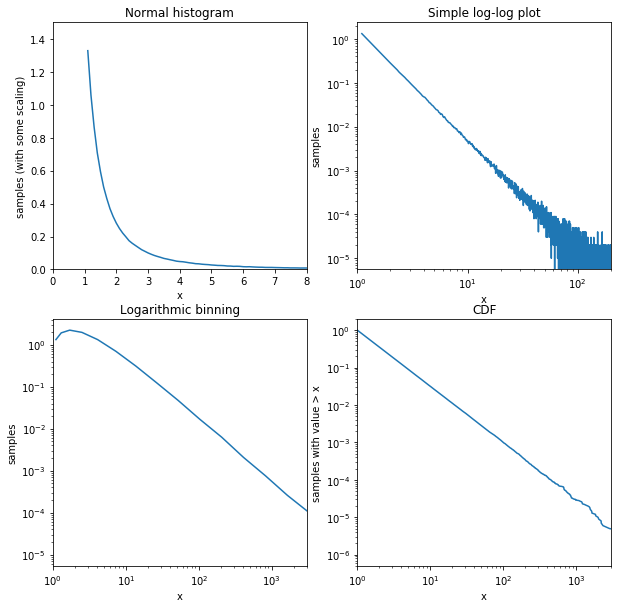

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
normal_histogram(axs[0,0], xs, x_min)
log_normal_histogram(axs[0,1], xs, x_min)
log_binning_histogram(axs[1,0], xs, x_min)
cdf_plot(axs[1,1], xs, x_min)

In [84]:
def get_alpha(xs, x_min):
    n = len(xs)
    alpha =  1 + n/np.sum(np.log(xs)/x_min)
    error = np.sqrt(n)/np.sum(np.log(xs)/x_min)
    return alpha, error
get_alpha(xs, x_min)

(2.501184085253354, 0.0015011840852533539)